In [1]:
# CNN program for similarity measure of two different wireless environments  

# Input- Grayscale images of moving object.
# Output- Test MSE corresponding to TL obtained at different splits.

In [2]:
# Importing library

# Below four lines at top for generalization

from numpy.random import seed
seed(0)
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(0)

import os
import cv2
import csv
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import shutil
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, r2_score
from sklearn import model_selection

from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
#To show the output within the jupyter notebook itself!
%matplotlib inline

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Activation, LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
# Path of images of wireless environments

path = r'image_wireless_env'

In [4]:
# Number of images in given path

num_image = len(os.listdir(path))
num_image

250

In [5]:
# Listing images present in the input image path

images = []
for i in sorted(os.listdir(path),key=len):
    images.append(i)

In [6]:
images

['mo1.jpg',
 'mo2.jpg',
 'mo3.jpg',
 'mo4.jpg',
 'mo5.jpg',
 'mo6.jpg',
 'mo7.jpg',
 'mo8.jpg',
 'mo9.jpg',
 'mo10.jpg',
 'mo11.jpg',
 'mo12.jpg',
 'mo13.jpg',
 'mo14.jpg',
 'mo15.jpg',
 'mo16.jpg',
 'mo17.jpg',
 'mo18.jpg',
 'mo19.jpg',
 'mo20.jpg',
 'mo21.jpg',
 'mo22.jpg',
 'mo23.jpg',
 'mo24.jpg',
 'mo25.jpg',
 'mo26.jpg',
 'mo27.jpg',
 'mo28.jpg',
 'mo29.jpg',
 'mo30.jpg',
 'mo31.jpg',
 'mo32.jpg',
 'mo33.jpg',
 'mo34.jpg',
 'mo35.jpg',
 'mo36.jpg',
 'mo37.jpg',
 'mo38.jpg',
 'mo39.jpg',
 'mo40.jpg',
 'mo41.jpg',
 'mo42.jpg',
 'mo43.jpg',
 'mo44.jpg',
 'mo45.jpg',
 'mo46.jpg',
 'mo47.jpg',
 'mo48.jpg',
 'mo49.jpg',
 'mo50.jpg',
 'mo51.jpg',
 'mo52.jpg',
 'mo53.jpg',
 'mo54.jpg',
 'mo55.jpg',
 'mo56.jpg',
 'mo57.jpg',
 'mo58.jpg',
 'mo59.jpg',
 'mo60.jpg',
 'mo61.jpg',
 'mo62.jpg',
 'mo63.jpg',
 'mo64.jpg',
 'mo65.jpg',
 'mo66.jpg',
 'mo67.jpg',
 'mo68.jpg',
 'mo69.jpg',
 'mo70.jpg',
 'mo71.jpg',
 'mo72.jpg',
 'mo73.jpg',
 'mo74.jpg',
 'mo75.jpg',
 'mo76.jpg',
 'mo77.jpg',
 'mo78.j

In [7]:
# Reading each image one-by-one with full path

new_images = []
for idx, i in enumerate(images):
    new_images.append(path + '/' + i)

In [8]:
# new_images

In [9]:
len(new_images)

250

In [10]:
# Loading colour images, converting into grayscale images and then into numpy array 
# https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/

x = []
for i in new_images:
    i = cv2.imread(i)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) # To convert into grayscale image
#     i = cv2.resize(i, (256, 256)) # To resize 
    i = np.array(i)  
    x.append(i)

In [11]:
# plt.imshow(x[0])

In [12]:
# i

In [13]:
x

[array([[253, 254, 253, ...,  65,   5,   1],
        [254, 255, 254, ...,  65,   5,   1],
        [254, 254, 255, ...,  65,   5,   1],
        ...,
        [  0,   1,   4, ...,   4,   1,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[253, 254, 253, ...,  65,   5,   1],
        [254, 255, 254, ...,  65,   5,   1],
        [254, 254, 255, ...,  65,   5,   1],
        ...,
        [  0,   1,   4, ...,   4,   1,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[253, 254, 253, ...,  65,   5,   1],
        [254, 255, 254, ...,  65,   5,   1],
        [254, 254, 255, ...,  65,   5,   1],
        ...,
        [  0,   1,   4, ...,   4,   1,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[253, 254, 253, ...,  65,   5,   1],
        [254, 255, 254, ...,  65,   5,   1],
        [254, 25

In [14]:
len(x)

250

In [15]:
# Converting "x" into numpy array form to fed as input to CNN

x = np.array(x) # Input to CNN
# x

In [16]:
# Height- in pixels
# Width- in pixels
# Depth- Number of channels of image (For RGB image, depth=3. For grayscale, depth=1)

print(x.shape)   # (number of images, height, width, depth)

(250, 275, 160)


In [17]:
x = np.expand_dims(x, axis=3) # Inserting a new axis in array x.

In [18]:
x.shape

(250, 275, 160, 1)

In [19]:
# x

In [20]:
# Path of csv file containing Test MSE corresponding to TL for each wireless environments

df = pd.read_csv(r'results_indoor_env_TL_all_main.csv')

In [21]:
df.head()

,Unnamed: 0,file_name,mse_train_0.95,mse_test_0.95,mae_train_0.95,mae_test_0.95,No_of_epochs_0.95,mse_train_0.9,mse_test_0.9,mae_train_0.9,...,mse_train_0.65,mse_test_0.65,mae_train_0.65,mae_test_0.65,No_of_epochs_0.65,mse_train_0.6,mse_test_0.6,mae_train_0.6,mae_test_0.6,No_of_epochs_0.6
0,0,indoor_env_1.csv,0.004947,0.006498,0.052033,0.058095,7.3,0.005125,0.005686,0.053014,...,0.003302,0.003504,0.041767,0.043208,8.1,0.003316,0.003432,0.041972,0.042948,7.3
1,1,indoor_env_2.csv,0.006414,0.007450,0.058957,0.064374,11.7,0.004149,0.004488,0.048481,...,0.003412,0.003683,0.044007,0.045100,7.4,0.003454,0.003740,0.044114,0.045324,10.7
2,2,indoor_env_3.csv,0.004109,0.004180,0.044626,0.047957,10.3,0.003782,0.004142,0.043781,...,0.003832,0.004132,0.046013,0.047672,8.9,0.003951,0.004212,0.047026,0.048698,9.2
3,3,indoor_env_4.csv,0.006560,0.006016,0.059575,0.058578,12.6,0.005578,0.005352,0.055257,...,0.004963,0.004734,0.052248,0.051547,11.2,0.004897,0.004732,0.052010,0.051595,12.8
4,4,indoor_env_5.csv,0.006002,0.007573,0.058788,0.065108,15.8,0.006535,0.006782,0.060179,...,0.004880,0.005133,0.052351,0.054183,10.3,0.004758,0.005003,0.052081,0.053705,10.0


In [22]:
df.shape

(250, 42)

In [23]:
# df.info()

In [24]:
df.describe()

,Unnamed: 0,mse_train_0.95,mse_test_0.95,mae_train_0.95,mae_test_0.95,No_of_epochs_0.95,mse_train_0.9,mse_test_0.9,mae_train_0.9,mae_test_0.9,...,mse_train_0.65,mse_test_0.65,mae_train_0.65,mae_test_0.65,No_of_epochs_0.65,mse_train_0.6,mse_test_0.6,mae_train_0.6,mae_test_0.6,No_of_epochs_0.6
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.005818,0.007155,0.056343,0.062414,14.030000,0.004812,0.005462,0.051230,0.054550,...,0.003704,0.003861,0.045017,0.045931,11.618000,0.003591,0.003740,0.044320,0.045170,11.372800
std,72.312977,0.001544,0.001891,0.007804,0.008332,5.702752,0.001006,0.001265,0.005589,0.006240,...,0.000618,0.000684,0.003838,0.004021,3.377548,0.000582,0.000636,0.003614,0.003779,3.337565
min,0.000000,0.002119,0.002952,0.035063,0.040774,6.500000,0.002673,0.002997,0.038412,0.040633,...,0.002682,0.002539,0.037216,0.037745,7.000000,0.002478,0.002561,0.036880,0.037285,7.200000
25%,62.250000,0.004720,0.005777,0.050676,0.056311,9.500000,0.004130,0.004541,0.047180,0.049677,...,0.003230,0.003308,0.042159,0.043002,9.100000,0.003173,0.003267,0.041911,0.042420,8.800000
50%,124.500000,0.005623,0.006902,0.056014,0.061913,13.150000,0.004740,0.005301,0.051052,0.054395,...,0.003570,0.003732,0.044286,0.045381,10.500000,0.003464,0.003629,0.043672,0.044676,10.300000
75%,186.750000,0.006849,0.008399,0.062045,0.068380,17.350000,0.005441,0.006163,0.054590,0.058438,...,0.004021,0.004233,0.046997,0.048229,13.300000,0.003907,0.004131,0.046298,0.047152,13.075000
max,249.000000,0.011918,0.013904,0.083061,0.089268,34.900000,0.008172,0.010251,0.069768,0.075629,...,0.005625,0.005965,0.057312,0.058140,23.800000,0.005488,0.005881,0.054704,0.057132,22.400000


In [25]:
# Output to CNN # Test MSE of TL obtained at test sizes (%) - 95, 90, 85, 80, 75, 70, 65, 60. 
                # In other words, Test MSE at train sizes (%) - 5, 10, 15, 20, 25, 30, 35, 40.

y = df[['mse_test_0.95', 'mse_test_0.9', 'mse_test_0.85', 'mse_test_0.8', 
        'mse_test_0.75', 'mse_test_0.7', 'mse_test_0.65', 'mse_test_0.6']]  
y.head()

,mse_test_0.95,mse_test_0.9,mse_test_0.85,mse_test_0.8,mse_test_0.75,mse_test_0.7,mse_test_0.65,mse_test_0.6
0,0.006498,0.005686,0.004273,0.003896,0.003403,0.003463,0.003504,0.003432
1,0.007450,0.004488,0.004464,0.004400,0.004403,0.004410,0.003683,0.003740
2,0.004180,0.004142,0.004195,0.004097,0.004092,0.004163,0.004132,0.004212
3,0.006016,0.005352,0.005374,0.004813,0.004818,0.004759,0.004734,0.004732
4,0.007573,0.006782,0.005679,0.005039,0.005068,0.005064,0.005133,0.005003


In [26]:
# Converting output "y" in array form

y = np.array(y)  
y # Test MSE corresponding to TL

array([[0.00649808, 0.0056862 , 0.00427338, ..., 0.00346292, 0.00350377,
        0.0034317 ],
       [0.00745   , 0.00448787, 0.00446423, ..., 0.00440973, 0.003683  ,
        0.00374048],
       [0.0041799 , 0.00414242, 0.00419531, ..., 0.00416266, 0.00413216,
        0.00421233],
       ...,
       [0.00901415, 0.00739423, 0.00479268, ..., 0.00472079, 0.00445654,
        0.00450649],
       [0.00911266, 0.00569508, 0.00496297, ..., 0.00447483, 0.00442853,
        0.00449262],
       [0.00502643, 0.0049148 , 0.0044272 , ..., 0.00422894, 0.00421611,
        0.00409816]])

In [27]:
y.shape

(250, 8)

In [28]:
# Splitting data for training and testing 
# Here both x and y are in array form (non-scaled)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
# Feature Scaling for Input image "x"
# Scaling pixel intensities of images to the range [0, 1]

x_train = x_train / 255.0
x_test = x_test / 255.0

In [30]:
x_train

array([[[[0.99215686],
         [0.99607843],
         [0.99215686],
         ...,
         [0.25490196],
         [0.01960784],
         [0.00392157]],

        [[0.99607843],
         [1.        ],
         [0.99607843],
         ...,
         [0.25490196],
         [0.01960784],
         [0.00392157]],

        [[0.99607843],
         [0.99607843],
         [1.        ],
         ...,
         [0.25490196],
         [0.01960784],
         [0.00392157]],

        ...,

        [[0.        ],
         [0.00392157],
         [0.01568627],
         ...,
         [0.01568627],
         [0.00392157],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.99215686],
         [0.99607843],
         [0.99

In [31]:
x_train.shape

(200, 275, 160, 1)

In [32]:
# Output Feature (MSE) Scaling # MinMaxScaler # zero mean, unit variance # range [0,1].

scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [33]:
y_train.shape

(200, 8)

In [34]:
# CNN model developed for x=> y mapping i.e, Images of moving object of floor plan -> Test MSE of TL at different splits.

In [35]:
# Building CNN network
# Note- input shape = (height, width, depth)
# depth = 3 for RGB, depth = 1 for grayscale

model = tf.keras.models.Sequential()                                      
model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu', input_shape=(275, 160, 1)))  # Ist CNN layer # 64 filters with size 3x3
model.add(tf.keras.layers.MaxPool2D(2,2))  # Ist max pooling layer of filter/pool size 2x2
model.add(tf.keras.layers.Dropout(0.1))  # Dropout
model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu')) # 2nd CNN layer with 32 filters with size 3x3
model.add(tf.keras.layers.MaxPool2D(2,2))  # 2nd max pooling layer of filter/pool size 2x2
model.add(tf.keras.layers.Dropout(0.1))  # Dropout
model.add(tf.keras.layers.Conv2D(16, (3, 3), strides=2, activation='relu')) # 3rd CNN layer with 16 filters with size 3x3
model.add(tf.keras.layers.MaxPool2D(2,2))  # 3rd max pooling layer of filter/pool size 2x2
model.add(tf.keras.layers.Dropout(0.1))  # Dropout
model.add(tf.keras.layers.Flatten())     # Flattening the network i.e, arranging values in a single row/column to feed NN
# After flattening, feeding input to fully-connected NN
model.add(tf.keras.layers.Dense(8, activation='relu'))  # Output layer of NN

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 137, 79, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 68, 39, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 68, 39, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 19, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 9, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 9, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 4, 16)          4

In [37]:
# compiling model
# opt = Adam
# opt = Adam(lr=1e-3, decay=1e-3 / 200)
# opt = tf.keras.optimizers.RMSprop(0.0099)

model.compile(optimizer=Adam(learning_rate = 0.0001), loss='mean_squared_error', metrics = ['mean_absolute_error']) 

In [38]:
# Early Stopping

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=2)

# it stops the training after 5 epochs if the validation loss doesn't improve
# Verbosity mode 0 = silent, 1 = progress bar, 2 = one line per epoch.

In [39]:
# Fitting CNN network to training set  

history=model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[early_stopping],
              batch_size=16, epochs=150, verbose=1)

# verbose 0 = silent, 1 = progress bar, 2 = one line per epoch; verbose=2 is recommended.

Epoch 1/150
13/13 [==============================] - 6s 304ms/step - loss: 0.1516 - mean_absolute_error: 0.3414 - val_loss: 0.1605 - val_mean_absolute_error: 0.3527
Epoch 2/150
13/13 [==============================] - 3s 245ms/step - loss: 0.1380 - mean_absolute_error: 0.3197 - val_loss: 0.1468 - val_mean_absolute_error: 0.3313
Epoch 3/150
13/13 [==============================] - 3s 248ms/step - loss: 0.1205 - mean_absolute_error: 0.2891 - val_loss: 0.1253 - val_mean_absolute_error: 0.2972
Epoch 4/150
13/13 [==============================] - 3s 268ms/step - loss: 0.0989 - mean_absolute_error: 0.2521 - val_loss: 0.1027 - val_mean_absolute_error: 0.2607
Epoch 5/150
13/13 [==============================] - 3s 260ms/step - loss: 0.0804 - mean_absolute_error: 0.2219 - val_loss: 0.0794 - val_mean_absolute_error: 0.2225
Epoch 6/150
13/13 [==============================] - 3s 229ms/step - loss: 0.0716 - mean_absolute_error: 0.2105 - val_loss: 0.0693 - val_mean_absolute_error: 0.2068
Epoch 7/15

In [40]:
# To save training history of model in csv file

# pd.DataFrame(history.history).to_csv("training_history.csv")

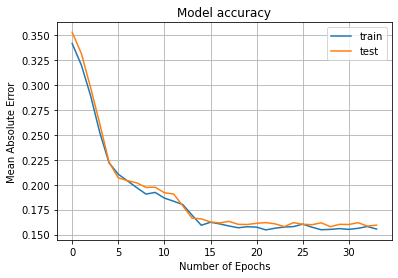

In [41]:
# To summarize history for accuracy
# Plot of accuracy on the training and validation (test) datasets over training epochs

acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']

plt.plot(acc)
plt.plot(val_acc)
plt.grid('True')
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('accuracy.pdf')
plt.show()

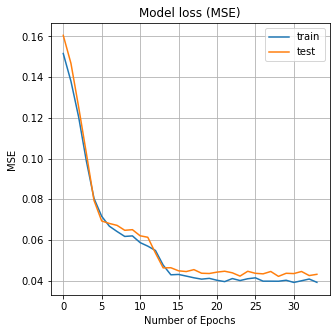

In [42]:
# To summarize history for loss
# Plot of loss on the training and validation (test) datasets over training epochs.

plt.figure(figsize=(5, 5))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.grid('True')
plt.title('Model loss (MSE)')
plt.ylabel('MSE')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'test'], loc='upper right')
# plt.ylim(0,0.3)
# plt.savefig('loss.pdf')
plt.show()

In [43]:
# Making the predictions for testing

# Predicting the Test set results
y_pred = model.predict(x_test) 
# y_pred

In [44]:
y_pred.shape

(50, 8)

In [45]:
y_test.shape

(50, 8)

In [46]:
# Model performance # Test error

# Measure MSE error  
mse_test = metrics.mean_squared_error(y_test, y_pred)
print("Test Mean Squared error (MSE): {}".format(mse_test))

# Measure RMSE error 
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Test Root mean squared error (RMSE): {}".format(rmse_test))

# Measure MAE error
mae_test = metrics.mean_absolute_error(y_test, y_pred)
print("Test Mean absolute error (MAE): {}".format(mae_test))

# # Regression score for test 
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.flatten()
r2_score_test = metrics.r2_score(y_test_flat, y_pred_flat)
print("R2 Score Test: {}".format(r2_score_test))

Test Mean Squared error (MSE): 0.04312254505552514
Test Root mean squared error (RMSE): 0.2076596856771317
Test Mean absolute error (MAE): 0.159488383083539
R2 Score Test: -0.19204398639145248


In [47]:
# Making the predictions for training

# Predicting the Training set results
y_pred_train = model.predict(x_train) 
# y_pred_train

In [48]:
y_pred_train.shape

(200, 8)

In [49]:
# Model performance # Training error

# Measure MSE error  
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
print("Training Mean Squared error (MSE): {}".format(mse_train))

# Measure RMSE error 
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print("Training Root mean squared error (RMSE): {}".format(rmse_train))

# Measure MAE error
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
print("Training Mean absolute error (MAE): {}".format(mae_train))

# # Regression score for training
y_pred_train_flat = y_pred_train.flatten()
y_train_flat = y_train.flatten()
r2_score_train = metrics.r2_score(y_train_flat, y_pred_train_flat)
print("R2 Score Train: {}".format(r2_score_train))

Training Mean Squared error (MSE): 0.040205620945683695
Training Root mean squared error (RMSE): 0.20051339343216876
Training Mean absolute error (MAE): 0.14886864524012094
R2 Score Train: -0.1368082684403722


In [50]:
# Saving results in csv file

no_epoch = len(loss)

results = pd.DataFrame([[mse_train, mse_test, mae_train, mae_test, no_epoch]],
columns=['MSE Train', 'MSE Test', 'MAE Train', 'MAE Test', 'No_of_Epochs'])
# results.to_csv('results_cnn_indoor_floor_plan_with_test_mse.csv')

In [51]:
results

,MSE Train,MSE Test,MAE Train,MAE Test,No_of_Epochs
0,0.040206,0.043123,0.148869,0.159488,34


In [52]:
# model.save('model_CNN_indoor_floor_plan_with_test_mse.h5')

In [53]:
# Predicting all output (MSE) before splitting data

y_real = model.predict(x/255) 
y_real

array([[0.293646  , 0.2661127 , 0.2533943 , ..., 0.31522   , 0.27456474,
        0.26627278],
       [0.293646  , 0.2661127 , 0.2533943 , ..., 0.31522   , 0.27456474,
        0.26627278],
       [0.293646  , 0.2661127 , 0.2533943 , ..., 0.31522   , 0.27456474,
        0.26627278],
       ...,
       [0.2969295 , 0.33510235, 0.25516632, ..., 0.29803348, 0.30387083,
        0.30177775],
       [0.29649252, 0.32220545, 0.25633684, ..., 0.30127516, 0.29624304,
        0.29905084],
       [0.29957002, 0.3107489 , 0.25631097, ..., 0.3056767 , 0.29346192,
        0.30004355]], dtype=float32)

In [54]:
y_real.shape

(250, 8)

In [55]:
# Taking inverse of min-max scalar to obtain y_real_inv (real test MSE) before splitting

y_real_inv = scaler.inverse_transform(y_real)
y_real_inv

array([[0.00616817, 0.00482747, 0.00429356, ..., 0.00377157, 0.00347946,
        0.00344514],
       [0.00616817, 0.00482747, 0.00429356, ..., 0.00377157, 0.00347946,
        0.00344514],
       [0.00616817, 0.00482747, 0.00429356, ..., 0.00377157, 0.00347946,
        0.00344514],
       ...,
       [0.00620413, 0.0053021 , 0.00430396, ..., 0.00370521, 0.00357989,
        0.00356302],
       [0.00619935, 0.00521337, 0.00431082, ..., 0.00371773, 0.00355375,
        0.00355397],
       [0.00623305, 0.00513456, 0.00431067, ..., 0.00373472, 0.00354422,
        0.00355726]], dtype=float32)

In [56]:
y_real_inv.shape

(250, 8)

In [57]:
# Converting numpy array to dataframe
# mse_test_0.95 means test mse with 95% test data or 5% train data
# y_real_inv = real test MSE before splitting data

df_y_real_inv = pd.DataFrame(data=y_real_inv, 
                             columns = ['mse_test_0.95', 'mse_test_0.9', 'mse_test_0.85', 'mse_test_0.8', 
                                        'mse_test_0.75', 'mse_test_0.7', 'mse_test_0.65', 'mse_test_0.6'])
df_y_real_inv.head()

,mse_test_0.95,mse_test_0.9,mse_test_0.85,mse_test_0.8,mse_test_0.75,mse_test_0.7,mse_test_0.65,mse_test_0.6
0,0.006168,0.004827,0.004294,0.00405,0.003927,0.003772,0.003479,0.003445
1,0.006168,0.004827,0.004294,0.00405,0.003927,0.003772,0.003479,0.003445
2,0.006168,0.004827,0.004294,0.00405,0.003927,0.003772,0.003479,0.003445
3,0.006168,0.004827,0.004294,0.00405,0.003927,0.003772,0.003479,0.003445
4,0.006168,0.004827,0.004294,0.00405,0.003927,0.003772,0.003479,0.003445


In [58]:
# Saving df_y_real_inv (inverse of predicted y_real/TL MSE) in csv file

df_y_real_inv.to_csv('results_y_real_inv.csv')

In [59]:
df1 = df_y_real_inv.copy() # Copying same data into new dataframe df1

In [60]:
df1.head()

,mse_test_0.95,mse_test_0.9,mse_test_0.85,mse_test_0.8,mse_test_0.75,mse_test_0.7,mse_test_0.65,mse_test_0.6
0,0.006168,0.004827,0.004294,0.00405,0.003927,0.003772,0.003479,0.003445
1,0.006168,0.004827,0.004294,0.00405,0.003927,0.003772,0.003479,0.003445
2,0.006168,0.004827,0.004294,0.00405,0.003927,0.003772,0.003479,0.003445
3,0.006168,0.004827,0.004294,0.00405,0.003927,0.003772,0.003479,0.003445
4,0.006168,0.004827,0.004294,0.00405,0.003927,0.003772,0.003479,0.003445


In [61]:
df1.describe()

,mse_test_0.95,mse_test_0.9,mse_test_0.85,mse_test_0.8,mse_test_0.75,mse_test_0.7,mse_test_0.65,mse_test_0.6
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.006191,0.004857,0.004352,0.004084,0.003931,0.003775,0.003512,0.003508
std,0.000133,0.000156,0.000110,0.000083,0.000075,0.000042,0.000043,0.000071
min,0.005435,0.004547,0.004002,0.003898,0.003614,0.003430,0.003467,0.003345
25%,0.006168,0.004814,0.004294,0.004050,0.003922,0.003772,0.003479,0.003445
50%,0.006168,0.004827,0.004294,0.004050,0.003927,0.003772,0.003487,0.003496
75%,0.006250,0.004895,0.004434,0.004125,0.003935,0.003796,0.003541,0.003563
max,0.006532,0.005302,0.004701,0.004289,0.004108,0.003861,0.003662,0.003688


In [62]:
# Percentage of train data = 100 - percentage of test data

train_data = ['5% train data','10% train data','15% train data','20% train data',
                  '25% train data','30% train data','35% train data','40% train data']
train_data

['5% train data',
 '10% train data',
 '15% train data',
 '20% train data',
 '25% train data',
 '30% train data',
 '35% train data',
 '40% train data']

In [63]:
# creating a dictionary

dictn = {
    'TL_decision': [], 
    'Data_needed': []
}

### Setting a threshold for test MSE corresponding to TL (say 0.004) and then comparing each row of output (test MSE of TL) with set threshold. If the measured test MSE corresponding to TL is less than threshold then it will say "Yes" TL can be perfomed and it will show corresponding percentage of training data needed for that particular wireless environment (input image).

In [64]:
thr = 0.004 # Threshold for Test MSE corresponding to TL= 0.004 

for i in range(len(df1)):
    go = False
    for idx, column in enumerate(df1.columns):
        val = float(df1.loc[i, column])
        if val < thr:
            dictn['TL_decision'].append('Yes')
            dictn['Data_needed'].append(train_data[idx])
            go = True
            break
    if go == False:
        dictn['TL_decision'].append('No')
        dictn['Data_needed'].append('No')

In [65]:
x = pd.DataFrame(dictn, columns=dictn.keys())

In [66]:
x.head()

,TL_decision,Data_needed
0,Yes,25% train data
1,Yes,25% train data
2,Yes,25% train data
3,Yes,25% train data
4,Yes,25% train data


In [67]:
# Saving TL decision result in csv file

x.to_csv('TL_decision_mse.csv')

In [68]:
# To see number of wireless environments performing/not performing TL operation

x['TL_decision'].value_counts() 

Yes    250
Name: TL_decision, dtype: int64

In [69]:
# To see, number of wireless environments taking same percentage of training data for TL operation

x[x['TL_decision'] == 'Yes'].value_counts() 

TL_decision  Data_needed   
Yes          25% train data    186
             30% train data     44
             20% train data     20
dtype: int64

In [70]:
# To see number of wireless environments performing TL

len(x[x['TL_decision'] == 'Yes'])

250

In [71]:
# Total number of wireless environments

len(x['TL_decision'])

250

In [72]:
# To calculate accuracy of model/TL recommendation-rate

acc = (len(x[x['TL_decision'] == 'Yes']))/len(x['TL_decision'])*100
acc

100.0

In [75]:
# To see, which wireless environments are performing/not performing TL operation

x[x['TL_decision'] == 'Yes'] # Yes/No

,TL_decision,Data_needed
0,Yes,25% train data
1,Yes,25% train data
2,Yes,25% train data
3,Yes,25% train data
4,Yes,25% train data
...,...,...
245,Yes,30% train data
246,Yes,30% train data
247,Yes,30% train data
248,Yes,30% train data


In [74]:
# done